# 1. Importation des bibliothèques nécessaires

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import pickle

In [15]:
# Chemin vers le dataset
data_path = '../data/raw/brain-tumor-mri-dataset/'
output_path = '../data/processed/brain-tumor-mri-dataset-processed/'

In [16]:
# Paramètres de prétraitement
image_size = (128, 128)  # Taille cible des images
classes = os.listdir(data_path)
num_classes = len(classes)

# 2. Chargement, conversion en grayscale et redimensionnement des images

In [17]:
def load_and_preprocess_images(data_path, classes, image_size):
    images = []
    labels = []
    for idx, cls in enumerate(classes):
        class_folder = os.path.join(data_path, cls)
        for img_name in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_name)
            try:
                # Chargement, conversion en grayscale et redimensionnement
                img = Image.open(img_path).convert("L")  # "L" pour grayscale
                img = img.resize(image_size)
                images.append(np.array(img))
                labels.append(idx)
            except Exception as e:
                print(f"Erreur avec l'image {img_name}: {e}")
    return np.array(images), np.array(labels)

print("Chargement et prétraitement des images...")
images, labels = load_and_preprocess_images(data_path, classes, image_size)


Chargement et prétraitement des images...


In [18]:
# Vérification des dimensions
print(f"Nombre total d'images : {images.shape[0]}")
print(f"Taille des images : {images.shape[1:]} (grayscale)")

Nombre total d'images : 7153
Taille des images : (128, 128) (grayscale)


# 3. Normalisation des images

In [19]:
images = images / 255.0  # Mise à l'échelle des pixels entre 0 et 1
print("Images normalisées.")

Images normalisées.


# 4. Reshape des images pour ajout d'une dimension de canal

In [20]:
images = images[..., np.newaxis]  # Ajout d'une dimension pour canal unique (grayscale)
print(f"Nouvelle forme des images : {images.shape}")

Nouvelle forme des images : (7153, 128, 128, 1)


# 5. Encodage des étiquettes (One-Hot Encoding)

In [21]:
labels = to_categorical(labels, num_classes=num_classes)
print("Étiquettes encodées en One-Hot.")

Étiquettes encodées en One-Hot.


# 6. Séparation des données en train et test

In [22]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
print(f"Ensemble d'entraînement : {X_train.shape[0]} images")
print(f"Ensemble de test : {X_test.shape[0]} images")

Ensemble d'entraînement : 5722 images
Ensemble de test : 1431 images


# 7. Enregistrement des données dans le répertoire 'data/processed/'

In [23]:
os.makedirs(output_path, exist_ok=True)

with open(os.path.join(output_path, 'X_train.pkl'), 'wb') as f:
    pickle.dump(X_train, f)
with open(os.path.join(output_path, 'y_train.pkl'), 'wb') as f:
    pickle.dump(y_train, f)
with open(os.path.join(output_path, 'X_test.pkl'), 'wb') as f:
    pickle.dump(X_test, f)
with open(os.path.join(output_path, 'y_test.pkl'), 'wb') as f:
    pickle.dump(y_test, f)

print(f"Les données prétraitées ont été enregistrées dans le répertoire '{output_path}'.")

Les données prétraitées ont été enregistrées dans le répertoire '../data/processed/brain-tumor-mri-dataset-processed/'.


# 8. Visualisation des images prétraitées

Visualisation des images prétraitées :


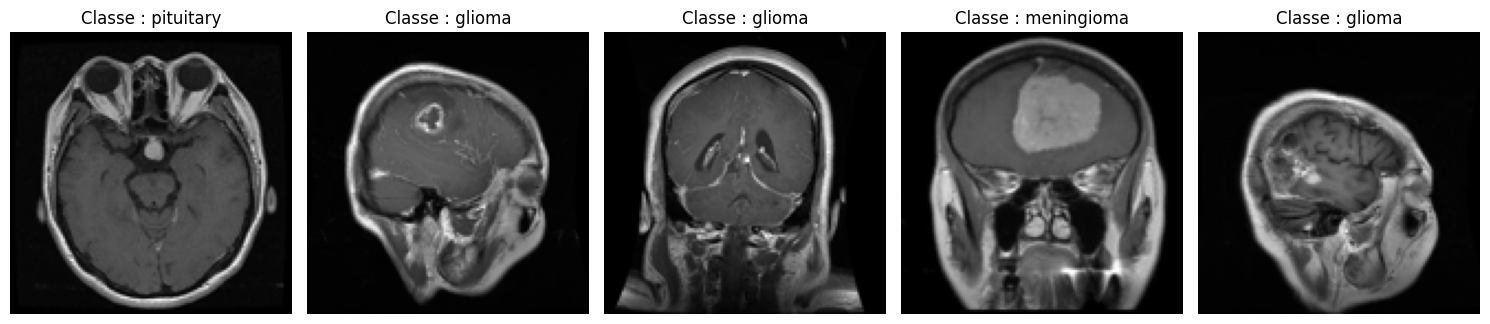

In [24]:
def visualize_preprocessed_images(X, y, classes, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(X[i].squeeze(), cmap='gray')  # Suppression de la dimension de canal
        label = classes[np.argmax(y[i])]
        plt.title(f"Classe : {label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

print("Visualisation des images prétraitées :")
visualize_preprocessed_images(X_train, y_train, classes)